# 7-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자


In [3]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

이번 프로젝트의 목표는 face_regonnition을 통해서 얼굴을 추출하고 그를 통해 임베딩 벡터를 계산해내어 그 거리(유사도)를 계산하는것입니다.   
이 목표를 위해서 저는 제 사진과 저와 가까운 연예인 사진을 찾아낸 후 임베딩 벡터를 계산하려 합니다. 
그 후 또 임베딩 벡터를 2차원으로 축소시킨후 시각화하여 가까운 사진들끼리 표시해보려고 합니다.               


## Step1. 사진 모으기
첫 번째로 사진을 모으려고 합니다. 

일단 관련 library들을 설치합니다.


``` terminal
$ pip install cmake
$ pip install dlib
$ pip install face_recognition --user
```


다운로드한 남자연예인 사진들은 **os.getenv('HOME')+'/aiffel/face_embedding/celebrity/** 에 모아놓았습니다.         
다음은 이미지 경로를 받아 얼굴영역을 출력하는 함수를 만들어보았습니다.

## Step2. 얼굴 영역 자르기
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

In [4]:
#이미지 경로를 받아 얼굴 영역을 출력하는 함수
def get_gropped_face(image_file):
    # [[YOUR CODE]]
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:
        return []
    a,b,c,d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    return cropped_face



In [5]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/슬기.jpg'


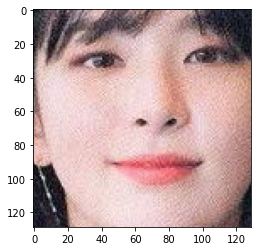

In [6]:
cropped_face =  get_gropped_face(image_path)
plt.imshow(cropped_face)

레드벨벳 슬기의 얼굴이 잘 출력됨을 확인 할 수있었습니다.    

## Step3. 얼굴 영역의 임베딩 추출하기
다음은 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수를 만들어 보겠습니다.  

def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수                    
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

face_recognition library를 사용합니다. 이때 사용하는 방식은 FaceNet이란 방식으로 

방식에 대한 자세한 설명은 아래 논문을 참고합시다.                                   
[FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/abs/1503.03832)          
위 논문은 Triplet loss를 사용해서 FaceNet 방법을 제시한 Florian Schroff 등의 논문입니다. 

In [7]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)



In [8]:
f_embedding = get_face_embedding(cropped_face)
print(f_embedding)
len(f_embedding[0])

[array([-0.06052021,  0.06835278,  0.01186832, -0.09102178, -0.11189971,
       -0.0645791 , -0.13560098, -0.02327373,  0.11560772, -0.12524557,
        0.16681609, -0.11579733, -0.21878842, -0.00724312, -0.06249505,
        0.22600181, -0.16262075, -0.17390428, -0.04521834, -0.01829843,
        0.13527511,  0.03766801, -0.07082734,  0.07745541, -0.10511614,
       -0.22437114, -0.08656888, -0.04492296, -0.00422653, -0.10708081,
       -0.01523907,  0.03364973, -0.15513851, -0.01214917,  0.10282889,
        0.15397398,  0.05121296, -0.10593807,  0.16004473,  0.01667101,
       -0.26582381,  0.09920523,  0.11416828,  0.21239263,  0.18045108,
        0.04215891, -0.02764121, -0.19499476,  0.13921964, -0.16498634,
        0.02428686,  0.19767235,  0.0904353 ,  0.09062508,  0.05896792,
       -0.13598585,  0.11171159,  0.10161243, -0.19464685, -0.06132139,
        0.08899246,  0.00050487,  0.00709973, -0.12611468,  0.21537267,
        0.04808784, -0.12811305, -0.25145054,  0.14794149, -0.1

128

128차원의 array로 만들어짐을 확인 할 수있었습니다.

다음은 경로 폴더의 전체 이미지파일을 모두 불러와 {이름: 임베딩 벡터}형태의 dict 형태로 만들어 보겠습니다.     

In [9]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))


file_list: ['나인뮤지스경리.jpg', '문재인.jpeg', '잭 니콜슨.jpeg', '조인성.jpg', '이광수.jpg', '차범근.jpeg', '윤아.jpg', '트와이스쯔위.jpg', '제프리 힌턴.jpg', '개리.jpg', '김학범.jpg', '백현.jpg', '안재홍.jpg', '이진호.jpeg', '차승원.jpg', '아이즈원민주.jpg', '박휘순.jpg', '박찬호.jpg', '로저 무어.jpeg', '한효주.jpg', '트와이스나연.jpg', '마동석.jpeg', '로다주.jpeg', '솔라.jpg', '박해일.jpeg', '김래원.jpeg', '조이.jpg', '수호.jpg', '찬열.jpeg', '조승우.jpeg', '산들.jpeg', '리사.jpg', '슬기.jpg', '러블리즈지수.jpeg', '도지한.jpg', '이승환.jpg', '스윙스.jpeg', '고창석.jpeg', '이효리.jpg', '저스틴 존슨.jpeg', '민니.jpg', '대도서관.jpeg', '매드클라운.jpeg', '심수창.jpeg', '서현진.jpg', 'RM.jpg', '리암 니슨.png', '아이즈원조유리.jpeg', '크리스 햄스워스.jpg', '손흥민.jpg', '옥냥이.jpeg', '지디.jpg', '케빈 스페이시.jpeg', '벤 에플렉.jpeg', 'trump.jpg', '오재원.jpg', '레인보우재경.jpg', '박보영.jpg', '제이홉.jpg', '이안 굿펠로우.jpg', '봉준호.jpg', '켄 정.jpeg', '지민(BTS).jpg', '최민식.jpg', 'biden.jpg', '박진영.jpg', '슬리피.jpg', '딕헌터.jpeg', '러블리즈예인.jpg', '김상호.png', 'b1a4진영.jpeg', '박건우.png', '철면수심.jpg', '강미나.jpg', '제이콥 배털론.jpg', '박명수.jpg', '류준열.jpg', '신태용.jpg', '하현우.jpg', '뷔.png', '김대명.jpeg', '티파니.jpg', '백

In [10]:
len(file_list)

277

총 277명의 연예인을 구할 수 있었습니다.

디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해 dict 구조에 담아 리턴하는 함수를 만듭니다.

In [11]:
#images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        # [[YOUR CODE]]
        img_path = os.path.join(dir_path,file)
        face = get_gropped_face(img_path)
        if len(face) == 0: continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음        
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]]  = embedding[0]        
    return embedding_dict

실제 경로를 넣어 불러와봅니다. 

In [12]:
embedding_dict = get_face_embedding_dict(dir_path)


연예인 노홍철씨의 사진을 불러와 봅니다.

In [13]:
embedding_dict['노홍철']

array([-1.40231460e-01,  8.26561153e-02,  5.98313324e-02,  1.72790233e-03,
       -1.49372175e-01, -8.44040960e-02, -6.72049634e-03, -1.22762546e-01,
        1.22107387e-01, -1.22006774e-01,  2.57990390e-01, -6.16155975e-02,
       -2.41671741e-01, -8.41149464e-02, -5.90962842e-02,  1.89632669e-01,
       -1.91333652e-01, -1.28907114e-01, -8.18250552e-02, -3.86912376e-02,
        7.29653984e-02, -9.06614028e-03,  1.88081264e-02,  5.47392713e-03,
        1.90354679e-02, -3.70998889e-01, -4.43183258e-02, -2.16679648e-02,
       -1.52514735e-02, -5.88093139e-02, -1.92872323e-02,  1.76697178e-03,
       -2.21194282e-01, -1.06390417e-01,  3.05038039e-03,  5.99070005e-02,
       -6.24258220e-02, -1.11234352e-01,  1.57651544e-01, -7.25505054e-02,
       -1.54689297e-01, -2.00408604e-03,  8.93029794e-02,  2.45605737e-01,
        1.94093660e-01,  2.53566131e-02, -1.83876250e-02, -1.49007961e-01,
        1.13426886e-01, -2.04335749e-01, -1.22295693e-04,  1.36895120e-01,
        8.84943828e-02,  

잘 불러왔음을 확인 할 수 있었습니다.

두 사람 얼굴의 L2거리를 반환하는 함수를 만들어봅니다.

In [14]:
## 사람의 이름을 받아 두 사람의 L2 거리를 반환하는 함수

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)



## Step4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아보겠습니다.

이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다.



In [16]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [17]:
def get_nearest_face(name, top=5):
    # [[YOUR CODE]]
    sort_key_func = get_sort_key_func(name)
    sorted_faces =    sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [18]:
get_nearest_face('노홍철')

순위 1 : 이름(이영하), 거리(0.4289371730561511)
순위 2 : 이름(고창석), 거리(0.44237509290150606)
순위 3 : 이름(안재홍), 거리(0.4540973781776503)
순위 4 : 이름(개코), 거리(0.4593759612909751)
순위 5 : 이름(주진모(올드)), 거리(0.4645139730205013)


이제 제 얼굴을 사용해보겠습니다. 

In [19]:
my_face_path = os.getenv('HOME') + '/aiffel/face_embedding/my_face/me.jpg'

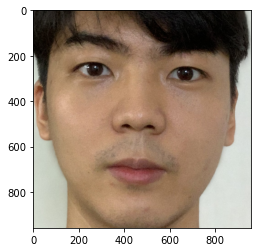

In [20]:
cropped_face_me =  get_gropped_face(my_face_path)
plt.imshow(cropped_face_me)

In [21]:
f_embedding_me = get_face_embedding(cropped_face_me)
print(f_embedding_me)
len(f_embedding_me[0])

[array([-8.86295661e-02,  6.88867271e-02, -3.35892178e-02, -2.62270644e-02,
       -5.66795319e-02, -1.08736001e-01, -2.91418545e-02, -1.49888605e-01,
        5.69471680e-02, -1.08377755e-01,  2.26382658e-01, -9.96733904e-02,
       -2.33749107e-01, -1.39969394e-01, -4.08598520e-02,  1.47754341e-01,
       -1.27585381e-01, -1.42254561e-01, -8.85116607e-02,  2.12700143e-02,
        1.43896043e-01,  4.22027260e-02,  2.07674932e-02,  7.30474964e-02,
       -1.30448192e-01, -3.20907772e-01, -1.43357247e-01, -7.94470981e-02,
       -7.76789710e-03, -6.02700822e-02, -7.86704794e-02,  3.42699736e-02,
       -2.02892661e-01, -1.18138380e-01,  4.01043855e-02,  4.19837758e-02,
        2.33052336e-02, -6.35455996e-02,  1.95824578e-01,  1.11368988e-02,
       -2.27937534e-01,  4.52089570e-02,  6.99719489e-02,  2.93734789e-01,
        1.95953965e-01,  8.35644640e-03,  3.38027552e-02, -1.35526165e-01,
        1.18133664e-01, -1.45154476e-01,  2.18322277e-02,  1.21320911e-01,
        1.03824370e-01, 

128

제 얼굴 사진의 임베딩을 구한 뒤 연예인들 임베딩 벡터가 있는 딕셔너리에 저를 추가합니다. 

In [22]:
embedding_dict['나'] = f_embedding_me[0]

In [23]:
get_nearest_face('나')

순위 1 : 이름(세훈), 거리(0.44003033774989514)
순위 2 : 이름(야마다 타카유키), 거리(0.46116607287681455)
순위 3 : 이름(김광현), 거리(0.4612659482659037)
순위 4 : 이름(RM), 거리(0.4671981661212918)
순위 5 : 이름(이대형), 거리(0.46759251036585203)


영광스럽게도 세훈, 야마다 타카유키, 김광현, RM,이대형님과 닮았다는 결과를 볼 수 있었습니다. 

## Step5. 다양한 재미있는 시각화 시도해 보기
저는 T-SNE를 통해 시각화한 연예인들의 사진을 2차원으로 표시해보도록하겠습니다.                  
닮은 연예인들끼리는 가까운 거리로, 닮지않은 얼굴들은 먼 거리로 나타날 것입니다.

T-SNE에 대한 설명은 아래 링크를 참고합시다.

[(영상) StatQuest: t-SNE, Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM)

In [24]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

일단 np의 array꼴을 만들기위해 임시 array를 만든다.     
embedding_dcit에서 key값은 따로 분류한다.            
value는 임시 array에 append한다.                    
그후 임시 append는 np.delete로 삭제한다.   

In [25]:
arr = np.empty((1, 128), dtype=np.float64)
names = []

for k,v in embedding_dict.items():
    arr = np.append(arr,v) 
    names.append(k)
arr = np.delete(arr, range(0,128))

그후 임베딩 벡터는 128꼴인데 이를 8*16으로 표현하도록 한다.

In [26]:
arr = arr.reshape(-1,128)

In [27]:
names


['나인뮤지스경리',
 '문재인',
 '잭 니콜슨',
 '조인성',
 '이광수',
 '차범근',
 '윤아',
 '트와이스쯔위',
 '제프리 힌턴',
 '개리',
 '김학범',
 '백현',
 '안재홍',
 '이진호',
 '차승원',
 '아이즈원민주',
 '박휘순',
 '박찬호',
 '로저 무어',
 '트와이스나연',
 '마동석',
 '로다주',
 '솔라',
 '박해일',
 '김래원',
 '조이',
 '수호',
 '찬열',
 '조승우',
 '리사',
 '슬기',
 '러블리즈지수',
 '도지한',
 '스윙스',
 '고창석',
 '이효리',
 '저스틴 존슨',
 '민니',
 '대도서관',
 '매드클라운',
 '심수창',
 '서현진',
 'RM',
 '리암 니슨',
 '아이즈원조유리',
 '크리스 햄스워스',
 '손흥민',
 '옥냥이',
 '지디',
 '케빈 스페이시',
 '벤 에플렉',
 'trump',
 '오재원',
 '레인보우재경',
 '박보영',
 '제이홉',
 '이안 굿펠로우',
 '봉준호',
 '켄 정',
 '지민(BTS)',
 '최민식',
 'biden',
 '박진영',
 '슬리피',
 '딕헌터',
 '러블리즈예인',
 '김상호',
 'b1a4진영',
 '박건우',
 '철면수심',
 '강미나',
 '제이콥 배털론',
 '박명수',
 '류준열',
 '하현우',
 '뷔',
 '티파니',
 '백윤식',
 '레드벨벳웬디',
 '한기범',
 '김경진',
 '김영삼',
 '제이크 질렌할',
 '지코',
 '하정우',
 '지호',
 '아린',
 '이동국',
 '손예진',
 '브래들리 쿠퍼',
 '윤균상',
 '이경규',
 '이재용',
 '류승룡',
 '온앤오프라운',
 '이준혁',
 '조달환',
 '유노윤호',
 '시우민',
 '박희순',
 '트와이스모모',
 '트와이스정연',
 '이정재',
 '유해진',
 '잇섭',
 '수지',
 '윤도현',
 '슈가',
 '주진모(올드)',
 '세훈',
 '이연걸',
 '이성민',
 '트와이스미나',
 '유아',
 'clinton'

키값의 첫값은 '나인뮤지스경리'이다.       
한번 우리가 만든 arr랑 비교를 통해 제대로 만들어졌는지 확인한다. 

In [28]:
arr[0]

array([-0.04223283,  0.07559739,  0.0688933 , -0.12170842, -0.13510992,
       -0.06712082, -0.12024201, -0.06760304,  0.18093196, -0.21169776,
        0.15301023, -0.0883735 , -0.18774118,  0.02374073, -0.0941866 ,
        0.23948953, -0.12788855, -0.14879094, -0.05447856,  0.01691375,
        0.04436696,  0.10455522, -0.010083  ,  0.04367556, -0.06782684,
       -0.32496658, -0.08370034, -0.03761286, -0.09869517, -0.10258781,
       -0.02092255,  0.05623925, -0.14101569, -0.00316369,  0.03326567,
        0.07913203, -0.03327127, -0.09670341,  0.11991058,  0.05705816,
       -0.32514882,  0.02964895,  0.07324576,  0.26206326,  0.17221005,
        0.01192696, -0.00278658, -0.19394735,  0.12136313, -0.22990011,
       -0.01564567,  0.10120488, -0.00214634,  0.04356378,  0.01648903,
       -0.11320938,  0.06830176,  0.0781817 , -0.11764054, -0.01884134,
        0.17639208, -0.04050617, -0.02887337, -0.11151139,  0.26620689,
        0.06457809, -0.14119473, -0.17029034,  0.12443383, -0.17

In [141]:
embedding_dict['나인뮤지스경리']

array([-0.04223283,  0.07559739,  0.0688933 , -0.12170842, -0.13510992,
       -0.06712082, -0.12024201, -0.06760304,  0.18093196, -0.21169776,
        0.15301023, -0.0883735 , -0.18774118,  0.02374073, -0.0941866 ,
        0.23948953, -0.12788855, -0.14879094, -0.05447856,  0.01691375,
        0.04436696,  0.10455522, -0.010083  ,  0.04367556, -0.06782684,
       -0.32496658, -0.08370034, -0.03761286, -0.09869517, -0.10258781,
       -0.02092255,  0.05623925, -0.14101569, -0.00316369,  0.03326567,
        0.07913203, -0.03327127, -0.09670341,  0.11991058,  0.05705816,
       -0.32514882,  0.02964895,  0.07324576,  0.26206326,  0.17221005,
        0.01192696, -0.00278658, -0.19394735,  0.12136313, -0.22990011,
       -0.01564567,  0.10120488, -0.00214634,  0.04356378,  0.01648903,
       -0.11320938,  0.06830176,  0.0781817 , -0.11764054, -0.01884134,
        0.17639208, -0.04050617, -0.02887337, -0.11151139,  0.26620689,
        0.06457809, -0.14119473, -0.17029034,  0.12443383, -0.17

In [29]:
arr[0] == embedding_dict['나인뮤지스경리']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]

값이 같음을 확인할 수 있었습니다.

In [45]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000)
tsne_results = tsne.fit_transform(arr)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 269 samples in 0.002s...
[t-SNE] Computed neighbors for 269 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 269 / 269
[t-SNE] Mean sigma: 0.103273
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.494682
[t-SNE] KL divergence after 1000 iterations: 1.320315
t-SNE done! Time elapsed: 0.5081729888916016 seconds


이제 TSNE를 한번 해보도록 하겠습니다.

In [42]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    # add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):
        # Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=8)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=2, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return f, ax, sc, txts

그림을 그리는 것은 구글링한 한 사이트를 참고하였습니다.
[출처](https://www.datacamp.com/community/tutorials/introduction-t-sne)

In [32]:
names_y = []
dic_i_name = {}
dic_name_i = {}
for i in range(0,len(names)):
    names_y.append(i)
    dic_i_name[i] = names[i]
    dic_name_i[names[i]] = i


이름들과 인덱스,그리고 그래프에 그려놓을 숫자를 뽑아냈습니다.

In [33]:
print(names_y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [34]:
names_y = np.array(names_y)

그래프에는 array만 받기에 그렇게 바꿔줍니다.

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-43.201504, -35.609356, '0'),
  Text(27.496077, 10.613968, '1'),
  Text(54.333687, 50.652435, '2'),
  Text(7.1124244, -10.220787, '3'),
  Text(-16.301294, -1.660991, '4'),
  Text(14.53771, -13.348558, '5'),
  Text(-51.96803, -26.523365, '6'),
  Text(-53.485764, -13.535083, '7'),
  Text(30.256557, 39.293507, '8'),
  Text(12.993395, -15.4364195, '9'),
  Text(39.555794, 10.843088, '10'),
  Text(-30.71671, 7.299998, '11'),
  Text(16.852152, -0.7807359, '12'),
  Text(-0.70859486, -0.34493187, '13'),
  Text(-12.977009, -15.745266, '14'),
  Text(-53.763023, -15.680097, '15'),
  Text(33.266094, 18.079123, '16'),
  Text(2.0187812, -18.48994, '17'),
  Text(39.820854, 41.877655, '18'),
  Text(-40.67028, -30.226475, '19'),
  Text(20.911747, 17.977966, '20'),
  Text(45.84552, 33.22943, '21'),
  Text(-48.499947, -30.802961, '22'),
  Text(38.06217, 9.838853, '23'),
  Text(-29.383451, 4.277079, '24'),
  Text(-40.039547, -24.89245, '25'),
  Te

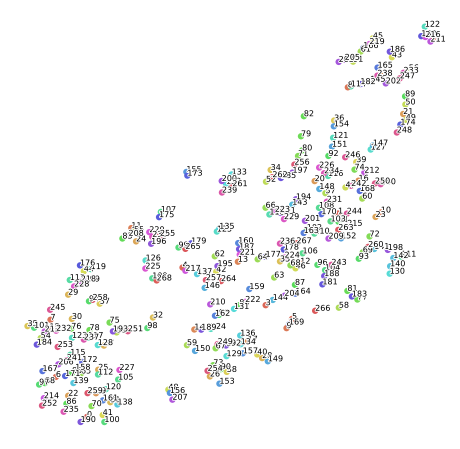

In [46]:
#print(tsne_results)
#print(tsne_results[:,0])
#print(tsne_results[:,1])
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
fashion_scatter(tsne_results, names_y)


잘 그려졌나 확인하기 위해 저를 찾아보겠습니다. 

In [206]:
dic_name_i['나']

268

In [192]:
get_nearest_face('나')

순위 1 : 이름(세훈), 거리(0.44003033774989514)
순위 2 : 이름(야마다 타카유키), 거리(0.46116607287681455)
순위 3 : 이름(김광현), 거리(0.4612659482659037)
순위 4 : 이름(RM), 거리(0.4671981661212918)
순위 5 : 이름(이대형), 거리(0.46759251036585203)


저와 가깝게 나타났던 사람들의 index를 확인해봅니다.

In [199]:
print(dic_name_i['세훈'],dic_name_i['야마다 타카유키'],dic_name_i['김광현'],dic_name_i['RM'],dic_name_i['이대형'])

109 257 132 42 195


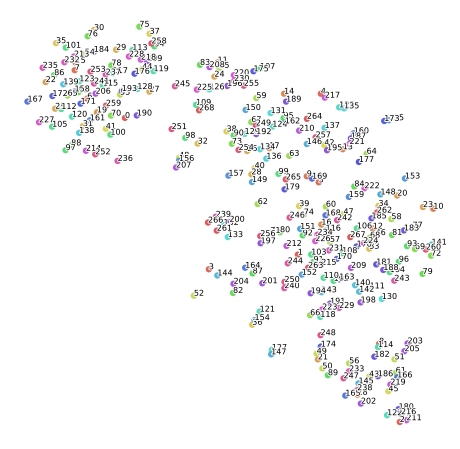

In [44]:
a = fashion_scatter(tsne_results, names_y)

그림상으론 268인 저와 야마다 타카유키(109번) 씨가 비슷한 위치에 그려진것을 확인할 수있었습니다.

저의 번호는 258번이고 저와 가깝게 나온 세훈과, 야마다 타카유키의 값을 찾아보았습니다.

|x축|y축|인덱스번호|이름
|:-:|:-:|:-:|:-:|
|-23.581894| -4.592729| '268'|나|
|-24.8218| -4.114907| '109'|세훈|
|-9.719961| -4.5250764| '257'|야마다 타카유키|
|-4.061981| 17.384165| '132'|김광현|
|-6.811008| -2.6361165| '42'|RM|
|-6.460527|-1.339229| '195'|이대형|



확실히 세훈씨와 저는 비슷한 거리로 그려졌지만 저와 가깝게 계산되었던 다른 사람들이랑은 다소 차이가 있음을 확인할 수있었습니다.

## 소고

한번 t-SNE를 통해 시각화를 진행해보았습니다. 그러면서 아쉬웠던 점을 적어보도록 하겟습니다.

* T-SNE는 할때마다 그 값이 조금씩 달라짐.       
         
반복횟수를 조금만 달리해도 값이 확확 변하는것을 보고 화실히 엄밀한 계산용은 아니라는 생각이 들었습니다.
        
        
* T-SNE는 확실히 군집용 시각용이다.          
               
저처럼 아예 각각의 사람들을 표현하기에는 확실히 좋지않은 방법이라는 생각이 들었습니다. 


* T-SNE의 하이퍼 페러미터 perplexity를 설정하기가 어렵다.              

값마다 변하는것이 다소 변동적인것을 느꼈습니다.          
너무 큰것과 작은것은 잘 시각화 안된다는 거 정도만 느껴졌습니다.

* T-SNE보다 더 좋은 방법?                 
[링크](https://data-newbie.tistory.com/295) 이 글에 따르면 T-SNE보다 더 우월한 UMAP 방법이 있다고합니다.
저도 읽어봤지만 사실 잘 이해는 되지않았습니다.


* 과연 올바른 거리 계산인가? 

사실 지금까지 예시로 든 저나 노홍철씨랑 가장 가까운 거리로 계산된 분들이         
별로 비슷하다는 느낌이 안들어서 뭔가 다른 더 좋은 방식이 있을 것같다는 생각이 듭니다.